In [1]:
import rasterio
import pandas as pd
import glob
from nso_ds_classes.nso_ds_models import cluster_scaler_BNDVIH_model
from nso_ds_classes.nso_ds_normalize_scaler import scaler_class_all
import pickle

c:\ProgramData\Anaconda3\lib\site-packages\geopandas\_compat.py:115: UserWarning: The Shapely GEOS version (3.4.3-CAPI-1.8.3 r4285) is incompatible with the GEOS version PyGEOS was compiled with (3.10.0-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


This notebook is used to turn the annotations into a dataframe which contains the RGBI NDVI and Height for the annotation.

In order to test different models against these ground truths.

# Load pixel information per annotation and store it in a pandas dataframe.

In [2]:
annotations = pd.read_csv("./score_model/annotations/annotations_coepelduynen_all_images.csv")

In [3]:
annotations

,coordinates,label
0,"88701.76,471428.85",Zand
1,"88721.52,470912.30",Zand
2,"88864.75,470850.32",Struweel
3,"88518.12,470826.00",Zand
4,"89275.201,471856.199",Pad
5,"88364.58,470599.96",Water
6,"87707.516,469920.189",Zand
7,"89081.779,471956.212",Struweel
8,"89260.326,471769.772",Laag gras
9,"89615.725,472113.130",Bos


In [4]:
df = pd.DataFrame([],columns=["r","g","b","i","ndvi","height","label","date","x_rd","y_rd"])

In [5]:
def __get_season_for_month(month):
    """
        This method get the season for a specific month for a number of a month.

        @param month: A month in number
        @return the season in string format, and the season in string format.
    """
    
    season = int(month)%12 // 3 + 1
    season_str = ""
    if season == 1:
        season_str = "Winter"
    if season == 2:
        season_str = "Spring"
    if season == 3:
        season_str = "Summer"
    if season == 4 :
        season_str = "Fall"
    #return season_str, season
    return season_str

In [6]:
# Loop through all the raster files to extract pixel information for the annotations
for file in glob.glob("E:/data/coepelduynen/*ndvi_height.tif"):

        file = file.replace("\\","/")
        print(file)
        inds = rasterio.open(file,'r') 
        meta = inds.meta
        tile = inds.read()
        for ix,row in annotations.iterrows():

                cor_index_1, cor_index_2 = float(row['coordinates'].split(",")[0]), float(row['coordinates'].split(",")[1])
                print(cor_index_1, cor_index_2)
                print(row['label'])
                index1 = inds.index(cor_index_1, cor_index_2)[0]
                index2 = inds.index(cor_index_1, cor_index_2)[1]

                cor = [ band[index1][index2] for band in tile]
                #model.get_label[model.predict(cor)]
                df = df.append({"r":cor[0],"g":cor[1],"b":cor[2],"i":cor[3],"ndvi":cor[4],"height":cor[5],"label":row['label'],"date":file.split("/")[-1].split("_")[0]+" "+file.split("/")[-1].split("_")[1],'rd_x':cor_index_1,'rd_y':cor_index_2 }, ignore_index=True)
                print(cor)

        inds.close()


E:/data/coepelduynen/20190302_105726_SV1-01_50cm_RD_11bit_RGBI_Warmond_natura2000_coepelduynen_cropped_ndvi_height.tif
88701.76 471428.85
Zand
[561, 596, 608, 766, 115, 1]
88721.52 470912.3
Zand
[612, 683, 737, 964, 122, 1]
88864.75 470850.32
Struweel
[526, 494, 417, 593, 105, 159]
88518.12 470826.0
Zand
[629, 712, 788, 1065, 125, 1]
89275.201 471856.199
Pad
[422, 352, 249, 263, 76, 1]
88364.58 470599.96
Water
[574, 576, 515, 652, 106, 0]
87707.516 469920.189
Zand
[486, 475, 408, 472, 98, 1]
89081.779 471956.212
Struweel
[441, 383, 276, 328, 85, 90]
89260.326 471769.772
Laag gras
[511, 474, 382, 434, 91, 1]
89615.725 472113.13
Bos
[419, 361, 255, 297, 82, 201]
88684.439 471686.159
Struweel
[450, 409, 317, 438, 98, 103]
88708.069 471654.917
Hoog gras
[458, 424, 357, 532, 107, 37]
88616.1083 471659.1439
Hoog gras
[458, 419, 332, 411, 94, 43]
88617.362 471648.302
Laag gras
[443, 400, 308, 371, 91, 1]
88342.79 470571.44
Water
[586, 591, 523, 641, 104, 0]
88817.611 470869.189
Laag gras
[520

In [8]:
df['season'] = df['date'].str[4:6].apply(__get_season_for_month)

In [10]:
df.to_csv("results_coordinates_annotations_all_files.csv")

# Train a model to score with the annotation data.

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [12]:
df = pd.read_csv("./results_coordinates_annotations_all_files.csv").drop(['Unnamed: 0'],axis=1)
df

,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
0,561,596,608,766,115,1,Zand,20190302 105726,88701.760,471428.850,Spring
1,612,683,737,964,122,1,Zand,20190302 105726,88721.520,470912.300,Spring
2,526,494,417,593,105,159,Struweel,20190302 105726,88864.750,470850.320,Spring
3,629,712,788,1065,125,1,Zand,20190302 105726,88518.120,470826.000,Spring
4,422,352,249,263,76,1,Pad,20190302 105726,89275.201,471856.199,Spring
...,...,...,...,...,...,...,...,...,...,...,...
905,2985,2241,2268,1407,64,170,Bos,20220816 111150,89104.830,472040.040,Summer
906,2858,2141,2158,1351,64,124,Struweel,20220816 111150,89457.290,471650.110,Summer
907,2808,2083,2098,1361,65,176,Struweel,20220816 111150,88992.780,471040.710,Summer
908,2905,2218,2301,1363,63,1,Zand,20220816 111150,88726.080,470913.930,Summer


In [13]:
df.sample(400)

,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
104,384,342,255,411,103,1,Laag gras,20190308 111644,88641.920,470532.170,Spring
531,486,487,469,629,112,1,Zand,20210302 111247,87707.516,469920.189,Spring
684,339,299,190,733,136,102,Struweel,20210907 112017,88324.650,470609.610,Fall
388,743,789,756,1011,115,1,Zand,20200625 112015,88518.120,470826.000,Summer
501,218,170,190,239,104,8,Hoog gras,20201231 105943,88708.069,471654.917,Winter
...,...,...,...,...,...,...,...,...,...,...,...
20,447,416,314,566,111,1,Laag gras,20190302 105726,87953.400,469948.070,Spring
733,333,328,349,602,128,1,Zand,20211226 103526,88726.080,470913.930,Winter
508,269,242,250,235,93,1,Zand,20201231 105943,88741.700,470682.280,Winter
706,320,294,285,454,117,1,Zand,20211226 103526,87707.516,469920.189,Winter


In [16]:
X_train, X_test, y_train, y_test = train_test_split(df[['r','g','b','i','ndvi','height']].values, df['label'].values,test_size=0.4)

In [19]:
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [20]:
model.score(X_test,y_test)

0.8434065934065934

In [24]:
model.feature_importances_

array([0.10736483, 0.1172942 , 0.18723256, 0.0887822 , 0.08233764,
       0.41698857])

In [23]:
filename = './models/randomforest_classifier_coepelduynen_2019_2022.sav'
pickle.dump(model, open(filename, 'wb'))

# Load a trained model and run metrics

In [27]:
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
filename ="./models/randomforest_classifier_coepelduynen_2019_2022.sav"
model = pickle.load(open(filename, 'rb'))

In [58]:
model.score(df[['r','g','b','i','ndvi','height']].values[180:362],df['label'].values[180:362])

0.9505494505494505

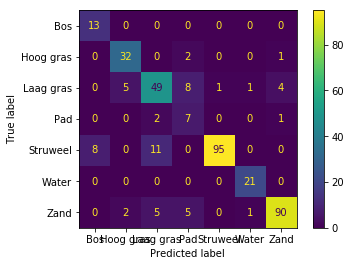

In [28]:
confusion_matrix = metrics.confusion_matrix(model.predict(X_test), y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)

cm_display.plot()
plt.show()

# Load scaled model

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
cluster_centers_file = "./cluster_centers/normalized_5_BHNDVI_cluster_centers_dunes.csv"

In [3]:
a_cluster_annotations_stats_model = cluster_scaler_BNDVIH_model(cluster_centers_file)

In [4]:
df = pd.read_csv("./results_coordinates_annotations_all_files.csv").drop(['Unnamed: 0'],axis=1)
df

,r,g,b,i,ndvi,height,label,date,rd_x,rd_y,season
0,561,596,608,766,115,1,Zand,20190302 105726,88701.760,471428.850,Spring
1,612,683,737,964,122,1,Zand,20190302 105726,88721.520,470912.300,Spring
2,526,494,417,593,105,159,Struweel,20190302 105726,88864.750,470850.320,Spring
3,629,712,788,1065,125,1,Zand,20190302 105726,88518.120,470826.000,Spring
4,422,352,249,263,76,1,Pad,20190302 105726,89275.201,471856.199,Spring
...,...,...,...,...,...,...,...,...,...,...,...
619,2750,2036,2056,1304,64,102,Struweel,20220816 111150,88324.650,470609.610,Summer
620,2726,2019,2071,1213,61,1,Laag gras,20220816 111150,87953.400,469948.070,Summer
621,2698,1988,2006,1256,63,3,Laag gras,20220816 111150,87827.018,469945.491,Summer
622,2906,2169,2199,1356,63,55,Struweel,20220816 111150,88517.910,471367.650,Summer


In [5]:
a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([df[['r','g','b','i','ndvi','height']].values[0]]))

'Bos'

## Prep dataframe for scaled model

In [29]:
df_scaled = df.copy()

In [30]:
for date in df_scaled['date'].unique():
    print(date)
    

    ahn_type = ""

    if int(date[0:4]) <= 2019:
        ahn_type = "./scalers/ahn3.save"
    elif int(date[0:4]) > 2019:
        ahn_type = "./scalers/ahn4.save"

    a_normalize_scaler_class_all = scaler_class_all(scaler_file_band1 = glob.glob("./scalers/"+date.split(" ")[0]+"*band1*")[0].replace("\\","/"), \
                                                    scaler_file_band2 = glob.glob("./scalers/"+date.split(" ")[0]+"*band2*")[0].replace("\\","/"), \
                                                    scaler_file_band3 = glob.glob("./scalers/"+date.split(" ")[0]+"*band3*")[0].replace("\\","/"), \
                                                    scaler_file_band4 = glob.glob("./scalers/"+date.split(" ")[0]+"*band4*")[0].replace("\\","/"), \
                                                    scaler_file_band5 = glob.glob("./scalers/"+date.split(" ")[0]+"*band5*")[0].replace("\\","/"), \
                                                    scaler_file_band6 = ahn_type)
    
    df_scaled[df_scaled['date'] == date] = a_normalize_scaler_class_all.transform(df_scaled[df_scaled['date'] == date], col_names=["r","g","b","i",'ndvi','height'])

20190302 105726
20190302 105829
20190308 111644


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20190422 111335
20190601 105844
20191130 110721


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20191202 110525
20200304 114601
20200323 112115
20200326 114323


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[3]] = self.scaler_band4.transform(pixel_df[col_names[3]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:91: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[4]] = self.scaler_band5.transform(pixel_df[col_names[4]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_d

20200508 110812
20200625 112015
20200731 112003


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20200915 112329
20201231 105943
20210302 111247


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20210423 104948
20210709 103835
20210815 111051


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[2]] = self.scaler_band3.transform(pixel_df[col_names[2]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:90: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[3]] = self.scaler_band4.transform(pixel_df[col_names[3]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20210907 112017
20211226 103526
20220302 112108


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

20220501 111418
20220514 114854
20220515 113347
20220816 111150


c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[0]] = self.scaler_band1.transform(pixel_df[col_names[0]].values.reshape(-1,1))
c:\repos\satellite-images-nso-datascience\nso_ds_classes\nso_ds_normalize_scaler.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pixel_df[col_names[1]] = self.scaler_band2.transform(pixel_df[col_names[1]].values.reshape(-1, 1))
c:\repos\satellite-images-nso-datascience\nso_d

In [31]:
df_scaled.to_csv("results_coordinates_annotations_all_files_scaled.csv")

In [42]:
df_scaled.groupby("label").mean()

,r,g,b,i,ndvi,height,rd_x,rd_y
label,,,,,,,,
Bos,0.248813,0.220843,0.196539,0.273416,0.763190,0.731373,89360.277500,472076.585000
Hoog gras,0.304366,0.286271,0.272222,0.256420,0.708522,0.122134,88496.369575,471417.514725
Laag gras,0.262999,0.241909,0.221032,0.261744,0.744508,0.077699,88517.039571,470860.007714
Pad,0.350429,0.331943,0.316503,0.259037,0.675283,0.013952,89020.915000,471798.362500
Struweel,0.253182,0.225501,0.201277,0.250965,0.736642,0.463784,88840.399889,471314.496778
Water,0.247686,0.216644,0.196883,0.189536,0.634891,0.000000,88353.685000,470585.700000
Zand,0.477006,0.502476,0.524527,0.347792,0.720794,0.006687,88540.045111,470885.783222


In [41]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled[['r','g','b','i','ndvi','height']].values, df_scaled['label'].values,test_size=0.4)

In [36]:
model = RandomForestClassifier()
model = model.fit(X_train,y_train)

In [38]:
model.score(X_test,y_test )

0.8489010989010989

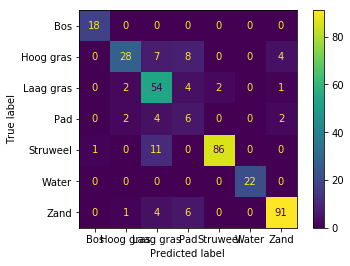

In [67]:
confusion_matrix = metrics.confusion_matrix(model.predict(X_test), y_test)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = model.classes_)

cm_display.plot()
plt.show()

In [65]:
model = RandomForestClassifier(n_estimators=3000,criterion="entropy", max_features=3)
print(cross_val_score(model,df_scaled[['r','g','b','i','ndvi','height']].values,df_scaled['label'].values, cv=4))
model = model.fit(X_train,y_train)

[0.75877193 0.90350877 0.92511013 0.75330396]


In [66]:
filename = './models/randomforest_classifier_coepelduynen_2019_2022_scaled.sav'
pickle.dump(model, open(filename, 'wb'))

## Implement old relative model.

In [13]:
df_scaled['predict'] = df_scaled.apply(lambda x: a_cluster_annotations_stats_model.get_class_label(a_cluster_annotations_stats_model.predict([x[['r','g','b','i','ndvi','height']]])), axis=1)

In [43]:
df_scaled["predict"] = df_scaled["predict"].replace("Water of Overig","Water")
df_scaled["label"] = df_scaled["label"].replace("Hoog Gras","Hoog gras")

In [44]:
df_scaled[df_scaled['label'] != "Pad"]['predict'].unique()

array(['Laag gras', 'Struweel', 'Bos', 'Hoog gras', 'Water', 'Zand'],
      dtype=object)

In [48]:
df_scaled[df_scaled['label'] != "Pad"]['label'].value_counts()

Struweel     156
Zand         130
Laag gras    130
Hoog gras     78
Water         52
Bos           26
Name: label, dtype: int64

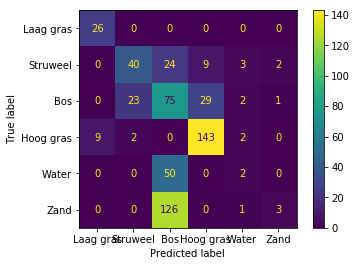

In [46]:
confusion_matrix = metrics.confusion_matrix(df_scaled[df_scaled['label'] != "Pad"]['label'].values, df_scaled[df_scaled['label'] != "Pad"]['predict'].values)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=df_scaled[df_scaled['label'] != "Pad"]['predict'].unique())

cm_display.plot()
plt.show()